In [ ]:
# Imports
import numpy as np
from sklearn import linear_model, datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

# Setting the figure size to a bigger one than the default
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16

MSE (validation set) linear model: 0.993558645130531
Ground truth slope: 9.566664723066065
Estimated slope: [9.55966986]
Ground truth intercept: 10.0
Estimated intercept: 9.986739423213335


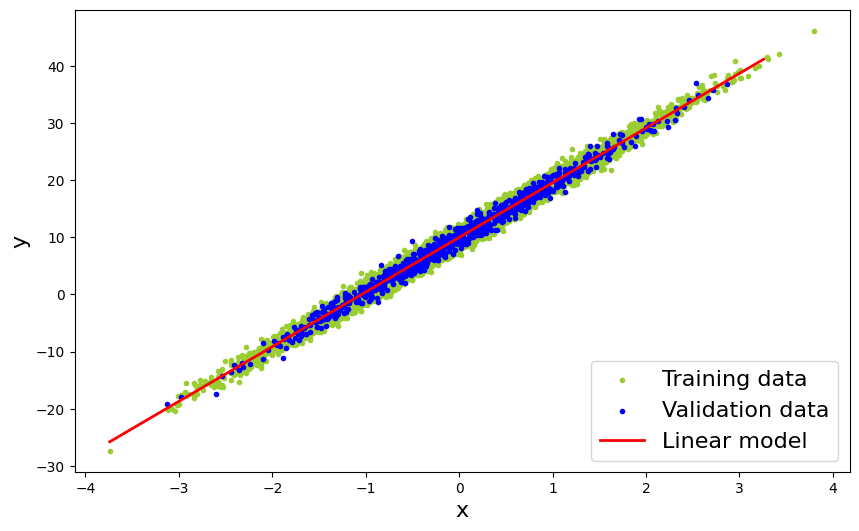

In [ ]:
n_samples = 10000 # Number of data samples
inlier_noise = 1 # Standard deviation of the noise
model_intercept = 10.0 # y-value when x=0

# Generate synthetic data
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, bias=model_intercept, noise=inlier_noise,
                                      coef=True, random_state=0)

# Do train, validation and test splits
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.1, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.1, random_state=7)

# Fit a linear regression model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

# Fit a second order polinomia
# poly = PolynomialFeatures(3)
# X_poly_2_train = poly.fit_transform(X_train)
# X_poly_2_val = poly.fit_transform(X_val)
# lr2 = linear_model.LinearRegression()
# lr2.fit(X_poly_2_train, y_train)
# y_poly_2_val_predicted = lr2.predict(X_poly_2_val)
# mse_poly_2_val = mean_squared_error(y_val, y_poly_2_val_predicted)

# Make predictions using the training and test data
# y_train_predicted = lr.predict(X_train)
y_val_predicted = lr.predict(X_val)
# mse_train = mean_squared_error(y_train, y_train_predicted)
mse_val = mean_squared_error(y_val, y_val_predicted)

# Use the model to generate data to plot
line_X_to_plot = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_to_plot = lr.predict(line_X_to_plot)

# Plot the data and the model
# print('MSE (training set): {}'.format(mse_train))
print('MSE (validation set) linear model: {}'.format(mse_val))
# print('MSE (validation set) 2nd order model: {}'.format(mse_poly_2_val))
print('Ground truth slope: {}'.format(coef))
print('Estimated slope: {}'.format(lr.coef_))
print('Ground truth intercept: {}'.format(model_intercept))
print('Estimated intercept: {}'.format(lr.intercept_))
#print('X: {}'.format(X[0:10,]))
#print('y: {}'.format(y[0:10,]))
plt.scatter(X_train, y_train, color='yellowgreen', marker='.',label='Training data')
plt.scatter(X_val, y_val, color='blue', marker='.',label='Validation data')
plt.plot(line_X_to_plot, line_y_to_plot, color='red', linewidth=2, label='Linear model')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

MSE (validation set): 2.0526301442750525


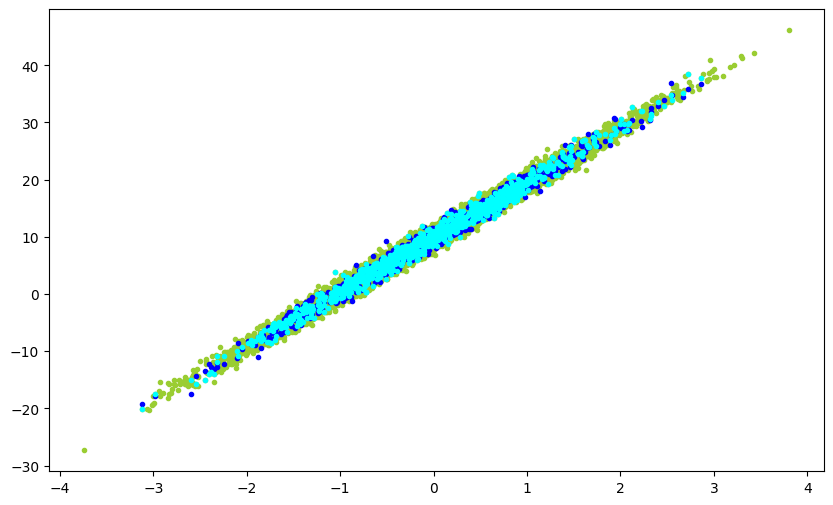

In [ ]:
# Fit a knn model
knn = neighbors.KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)

# Make predictions using the training and test data
# y_train_predicted = knn.predict(X_train)
y_val_predicted = knn.predict(X_val)
# rmse_train = mean_squared_error(y_train, y_train_predicted)
mse_val = mean_squared_error(y_val, y_val_predicted)

# Plot the data and the model
# print('MSE (training set): {}'.format(mse_train))
print('MSE (validation set): {}'.format(mse_val))

plt.scatter(X_train, y_train, color='yellowgreen', marker='.',label='Training data')
plt.scatter(X_val, y_val, color='blue', marker='.',label='Validation data')
plt.scatter(X_val, y_val_predicted, color='cyan', marker='.',label='Validation predictions')